# Исследование объявлений о продаже квартир

Необходимо на осовании данных сервиса Яндекс.Недвижимость определить рыночную стоимость объектов недвижимости и типичные параметры квартир

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
display(df.shape)
display(df.info())

(23699, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

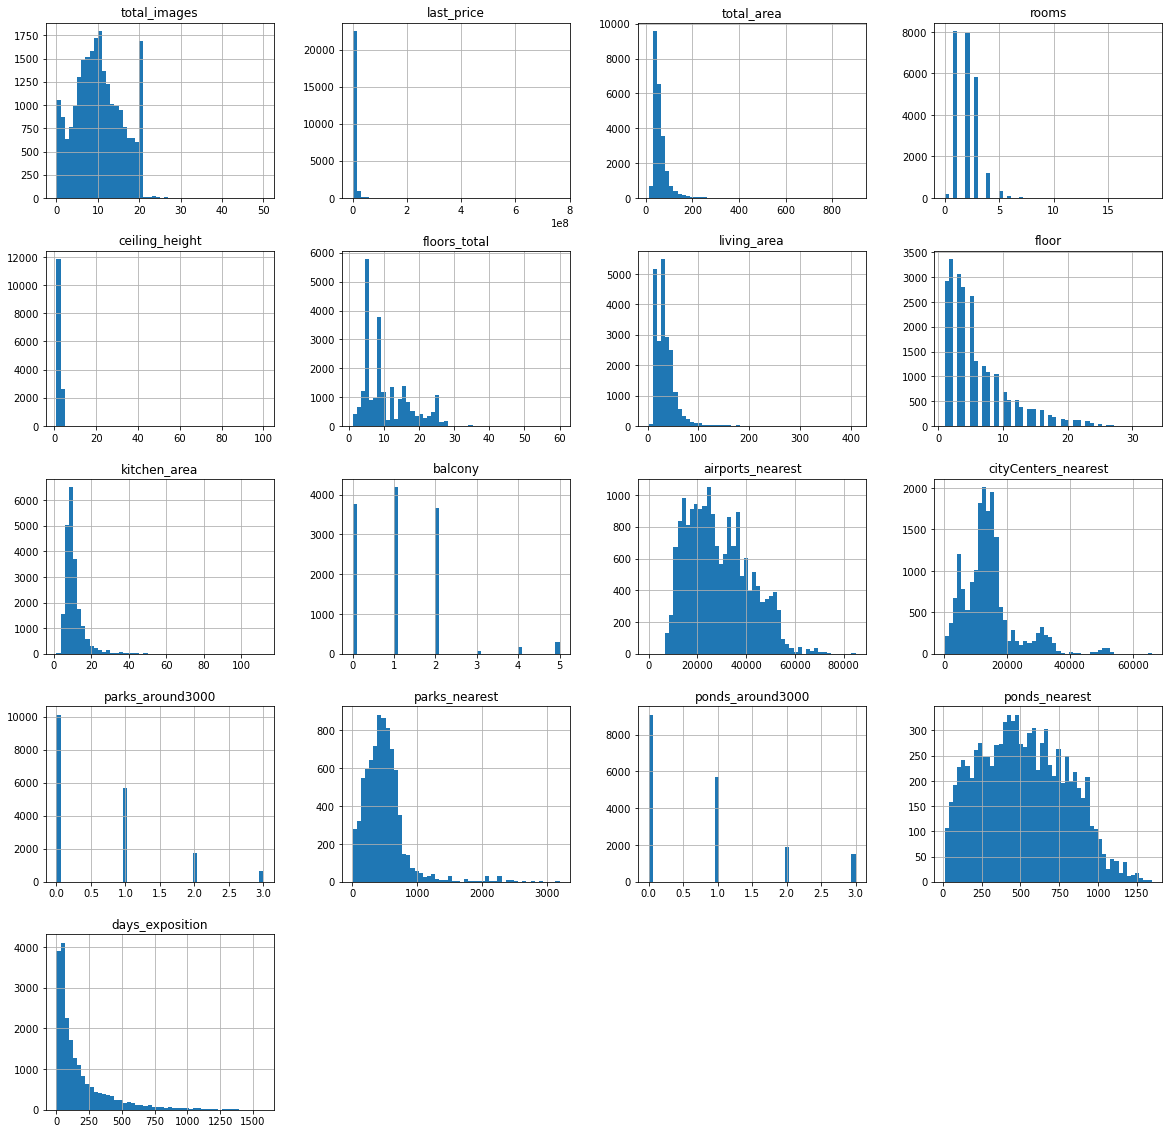

In [4]:
df.hist(figsize=(20,20), bins=50);

По данным на текущем этапе можно сделать вывод,что:
1) Количество фотографий квартиры в среднем составляет ок. 10. Варьируется от 0 до 20, более 20 фотографий встречается в единичных случаях

2) Вывод о цене по данному графику сделать сложно, необходим дополнительный.

3) Общая площадь в среднем ок. 50 кв.м. Минимальная примерно 20, максимальная ок. 250, но площадь большинства квартир не превышает 200 кв.м. График необходимо укрупнить

4) Большинство квартир 2х и 3х комнатные. Основная часть квартир находится в пределах от 1 до 5 комнат, 6 и 7 комнатные квартиры единичные

5) График не позволяет сделать вывод о высоте потолков

6) Общее количество этажей колеблется от 1 до 28. Есть показатель примерно на уровне 35 этажей. большее число квартир находится на 5 этаже

7) Жилая площадь составляет от 20 до 180 кв.м. Подъемы на уровне 35 и 50 кв.м

8) Этаж квартиры соответствует распределению Пуассона. 

9) Площадь кухни варьируется от 3 до 30 кв.м. Подъем на уровнре 10 кв.м. Есть квартиры с кухней более 40 кв.м

10) В большинстве квартир есть 1 балкон или балкона вообще нет. Есть квартиры с 4 и 5 балконами

11) большинство квартир расположено в от 10 до 80 км от аэропорта. В среднем - в 25 км. Есть подъемы на уровне 15 и 35 км

12) Большинство квартир расположены от 0 до 40км от центра города. Среднее - примерно 17 км.

13) Чаще всего в округе нет парка. Более 3 парков не встречается

14) Если парк есть, то он в среднем расположен в 500м от дома

15) Чаще всего в округе нет водоема. Более 3 водоемов не встречается

16) Распределение расстояния до ближайшего водоема стремится к нормальному. В среднем - в 500м

17) Большинство объявлений было размещено ок 70 дней. Максимум - 1350

<AxesSubplot:>

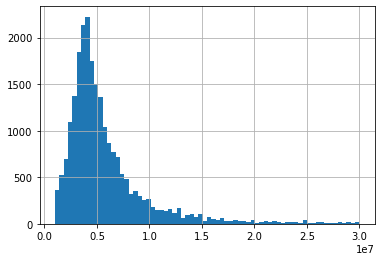

In [5]:
df['last_price'].hist(bins=70, range=(1000000, 30000000))

Средняя цена составляет примерно 3,5 млн. Цена варьируется от 1,5 до 20 млн

Высота потолков в среднем составляет 2,5 м

### Предобработка данных

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Изменение типа данных

Изменяем типы данных в 2 категориях: дата первой публикации и апартаменты. В первом случае меняем на datetime, во втором - на bool

In [7]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(df['is_apartment'].unique())
df['is_apartment']=df['is_apartment'].fillna('False')
df['is_apartment']= df['is_apartment'].astype('bool')

array([nan, False, True], dtype=object)

#### Пропуски в данных о высоте потолков

In [8]:
df['ceiling_height'].isna().sum()

9195

In [9]:
display(df['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

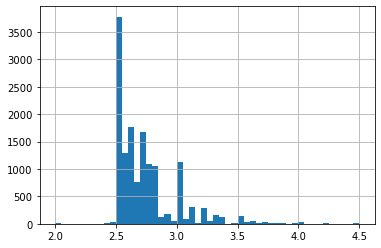

In [10]:
df['ceiling_height'].hist(bins=50, range=(2, 4.5))

Большинство квартир имеет высоту потолков от 2,5 до 2,8 м. Минимальное значение - 1м. Максимальное - 100м. Скорее всего, это выбросы.
Пропущенные значения можно заполнить медианой

In [11]:
display(df.loc[df['ceiling_height']>4.5, 'total_images'].count())
display(df.loc[df['ceiling_height']<2.4, 'total_images'].count())

42

21

Квартиры с высотой потолков менее 2,4 и более 4.5 м можно считать выбросами и их следует удалить.Скорее всего, высота потолков более 20м - техническая ошибка, пропук разделительной запятой. Это можно исправить, разделив значения на 10.

Пропущенные значения можно заполнить медианой

In [12]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height']<20, df['ceiling_height']/10)
df=df.query('2.4<=ceiling_height<=4 or ceiling_height.isna()')
value = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(value)

In [13]:
display(df['ceiling_height'].describe())

count    23623.000000
mean         2.693781
std          0.204084
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

#### Заполнение пропусков жилой площади помещения

<AxesSubplot:xlabel='living_area', ylabel='total_area'>

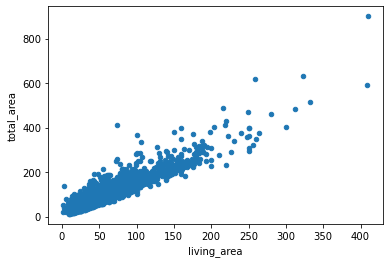

In [14]:
 df.plot(x='living_area', y='total_area', kind='scatter')

In [15]:
df['total_area'].corr(df['living_area'])

0.93771718680431

Связь между общей и жилой площадью прямая, сильная. В данных об общей площади нет пропусков, можно заполнить пропуски жилой площади на основании общей.

In [16]:
df['living_to_total']=df['living_area']/df['total_area']
display(df['living_to_total'].describe())
coef_area = df['living_to_total'].mean()
print(coef_area)

count    21729.000000
mean         0.564641
std          0.105277
min          0.021583
25%          0.495122
50%          0.567742
75%          0.637720
max          1.000000
Name: living_to_total, dtype: float64

0.5646407881097327


In [17]:
df['living_area'] = df['living_area'].fillna(df['total_area']*coef_area)

Таким образом, я отбросила квартиры с общей площадью менее 20 и более 300 кв.м.

Затем я посчитала среднее соотношение между жилой и общей площадью и заполнила пропуске в пукте жилая площадь на основании данных об общей площади и полученного соотношения.

#### Изменение типов населенных пунктов

In [18]:
display(len(df['locality_name'].unique()))

df['locality_name_new'] = df['locality_name'].str.replace('ё','е')
df['locality_name_new'] = df['locality_name_new'].str.replace('поселок городского типа','поселок')
df['locality_name_new'] = df['locality_name_new'].str.replace('городской поселок','поселок')
df['locality_name_new'] = df['locality_name_new'].str.replace('при железнодорожной ','')
df['locality_name_new'] = df['locality_name_new'].str.replace('деревня Кудрово','Кудрово')

display(len(df['locality_name_new'].unique()))

365

320

### Заполнение пропусков в столбце Балконы

Предполагаю, что если значение не указано, то балкона нет. Заполню пропуски цифрой 0

In [19]:
df['balcony'] = df['balcony'].fillna(0)

### Парки и водоемы поблизости

Ели во всем населенном пункте это значение пропущено, можно предположить, что здесь нет ни одного парка или водоема. Заполнять это значение медианой некорректно, так как у нас нет информации о расположении квартиры

In [20]:
df.groupby('locality_name_new')['parks_nearest'].count().sort_values(ascending=False)

locality_name_new
Санкт-Петербург      7248
Пушкин                212
Петергоф              143
Колпино               133
Кронштадт              87
                     ... 
деревня Пчева           0
деревня Пустынка        0
деревня Пудомяги        0
деревня Пикколово       0
село Шум                0
Name: parks_nearest, Length: 319, dtype: int64

In [21]:
df.groupby('locality_name_new')['ponds_nearest'].count().sort_values(ascending=False)

locality_name_new
Санкт-Петербург      7946
Колпино               190
Пушкин                177
поселок Шушары        152
Сестрорецк            135
                     ... 
деревня Пустынка        0
деревня Пудомяги        0
деревня Пикколово       0
деревня Пижма           0
село Шум                0
Name: ponds_nearest, Length: 319, dtype: int64

### Число парков и водоемов в радиусе 3 км

Скорее всего, если это значение не указано, то и парка/водоема поблизости нет. Можно заполнить пропуски нyлем

In [22]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)

### Поиск аномалий в оставшихся столбцах

In [23]:
df['days_exposition'].describe()

count    20454.000000
mean       180.660262
std        219.483963
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [24]:
df.query('days_exposition<5')['days_exposition'].describe()

count    338.000000
mean       3.505917
std        0.535084
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: days_exposition, dtype: float64

In [25]:
df.query('days_exposition>1000')['days_exposition'].describe()

count     273.000000
mean     1170.373626
std       133.929496
min      1001.000000
25%      1069.000000
50%      1141.000000
75%      1240.000000
max      1580.000000
Name: days_exposition, dtype: float64

Удалим аномальные значения размещения объявлений

In [26]:
df=df.query('5<=days_exposition<=1000 or days_exposition.isna()')

In [27]:
df['floors_total'].describe()

count    22929.000000
mean        10.679969
std          6.598129
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Значения этажей больше 29 можно считать выбросами.

In [28]:
df=df.query('floors_total<29 or floors_total.isna()')

In [29]:
df['rooms'].describe()

count    22981.000000
mean         2.067926
std          1.073110
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [30]:
df.query('rooms>6')['rooms'].describe()

count    87.000000
mean      7.965517
std       2.025697
min       7.000000
25%       7.000000
50%       7.000000
75%       8.000000
max      19.000000
Name: rooms, dtype: float64

Всего 76 квартир имеют более 6 комнат. Эти значения можно считать аномалиями.

In [31]:
df=df.query('rooms<=6 or rooms.isna()')

In [32]:
df['kitchen_area'].describe()

count    20680.000000
mean        10.479729
std          5.683190
min          1.300000
25%          7.000000
50%          9.005000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [33]:
df.query('kitchen_area>45')['kitchen_area'].describe()

count     58.000000
mean      58.967241
std       13.856715
min       46.000000
25%       50.000000
50%       54.250000
75%       63.750000
max      107.000000
Name: kitchen_area, dtype: float64

In [34]:
df.query('kitchen_area<5')['kitchen_area'].describe()

count    100.000000
mean       4.009900
std        0.845979
min        1.300000
25%        3.800000
50%        4.000000
75%        4.700000
max        4.900000
Name: kitchen_area, dtype: float64

Всего 59 квартир имеют кухни более 45 кв.м. и 98 квартир имеют кухни площадью менее 5 кв.м.

In [35]:
df = df.query('5<=kitchen_area<=45 or kitchen_area.isna()')

In [36]:
df['last_price_mln']=df['last_price']/1000000
df['last_price_mln'].describe()

count    22736.000000
mean         6.236831
std          8.274826
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        401.300000
Name: last_price_mln, dtype: float64

In [37]:
df.query('last_price_mln<1')['last_price_mln'].describe()

count    220.000000
mean       0.766850
std        0.162718
min        0.012190
25%        0.650000
50%        0.790000
75%        0.900000
max        0.999999
Name: last_price_mln, dtype: float64

In [38]:
df.query('last_price_mln>40')['last_price_mln'].describe()

count    125.000000
mean      81.127062
std       57.447172
min       40.348248
25%       49.900000
50%       62.171920
75%       83.000000
max      401.300000
Name: last_price_mln, dtype: float64

220 квартир стоили менее 1 млн и 122 квартиры стоили более 40 млн

In [39]:
df = df.query('1<=last_price_mln<=40 or last_price_mln.isna()')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22391 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22391 non-null  int64         
 1   last_price            22391 non-null  float64       
 2   total_area            22391 non-null  float64       
 3   first_day_exposition  22391 non-null  datetime64[ns]
 4   rooms                 22391 non-null  int64         
 5   ceiling_height        22391 non-null  float64       
 6   floors_total          22310 non-null  float64       
 7   living_area           22391 non-null  float64       
 8   floor                 22391 non-null  int64         
 9   is_apartment          22391 non-null  bool          
 10  studio                22391 non-null  bool          
 11  open_plan             22391 non-null  bool          
 12  kitchen_area          20240 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
#Цена за 1 кв.м. в тыс.руб
df['sq_met_price']=df['last_price']/df['total_area']/1000
# День недели, меяц, год публикации объявления
df['week_day']=df['first_day_exposition'].dt.weekday
df['month']=df['first_day_exposition'].dt.month
df['year']=df['first_day_exposition'].dt.year
#Определение типа этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'
df['floor_type'] = df.apply(floor_type, axis=1)
#Расстояние до центра города в км
df['city_center_km']= round(df['cityCenters_nearest']/1000)

### Проведите исследовательский анализ данных

AxesSubplot(0.125,0.125;0.775x0.755)


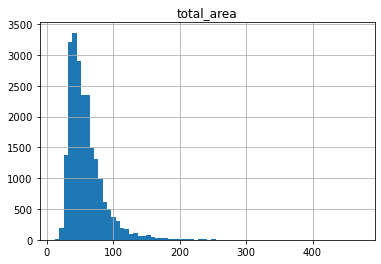


AxesSubplot(0.125,0.125;0.775x0.755)


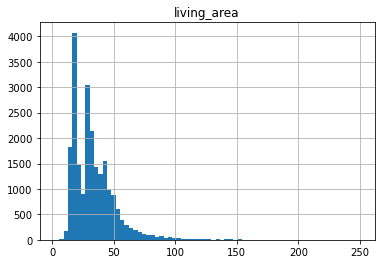


AxesSubplot(0.125,0.125;0.775x0.755)


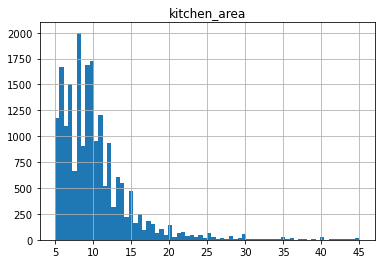


AxesSubplot(0.125,0.125;0.775x0.755)


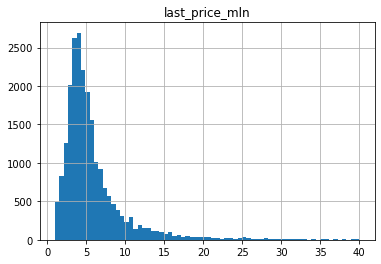


AxesSubplot(0.125,0.125;0.775x0.755)


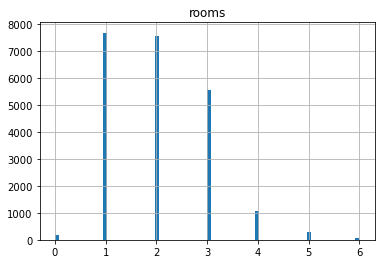


AxesSubplot(0.125,0.125;0.775x0.755)


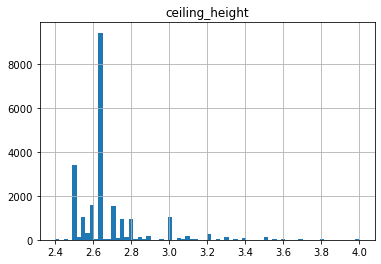


AxesSubplot(0.125,0.125;0.775x0.755)


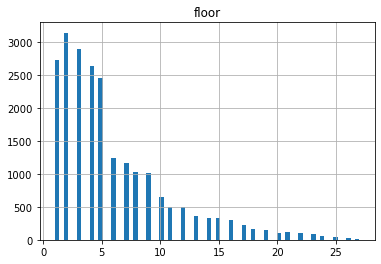


AxesSubplot(0.125,0.125;0.775x0.755)


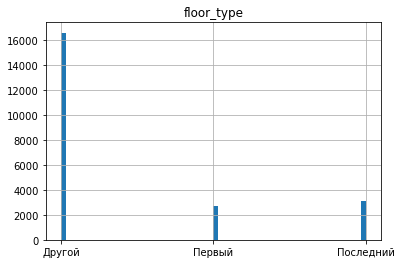


AxesSubplot(0.125,0.125;0.775x0.755)


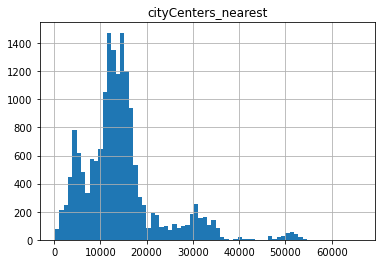


AxesSubplot(0.125,0.125;0.775x0.755)


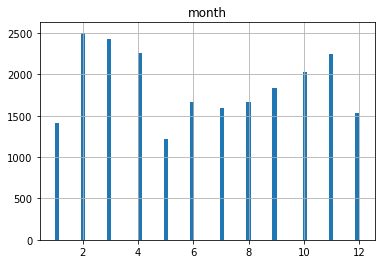


AxesSubplot(0.125,0.125;0.775x0.755)


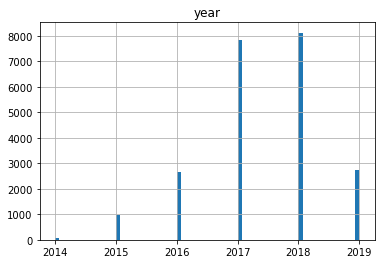


AxesSubplot(0.125,0.125;0.775x0.755)


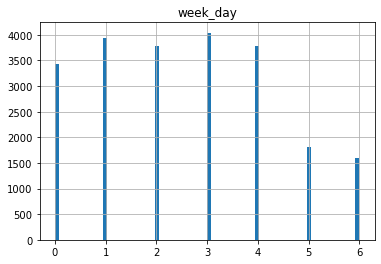

In [42]:
columns = [
    'total_area', 'living_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height', 'floor', 
    'floor_type', 'cityCenters_nearest', 'month', 'year', 'week_day'
]

for i in columns:
    print(df[i].hist(bins=70))
    plt.title(i)
    plt.show()
    print('')

Площадь большинства квартир находится в пределах от 25 до 100 кв.м.

Жилая площадь большиства квартир составляет 12-60 кв.м. Максимум - на уровне 18 кв м, на ур. 25 кв.м наблюдается провал

Площадь кухни в осовном составляет от 5 до 15 кв м. Есть подъемы и провалы

Окончательная цена в среднем варьируется от 2 до 10 млн. Стремится к нормальному распределению

В большинстве квартир 1/2/3 комнаты. 0 комнат в квартирах-студиях

Высота потолков большинства квартир составляет от 2,5 до 2,8м. Подъем графика - на уровне 2,7м

Большинство квартир расположены до 5 этажа жилого дома

Большинство квартир не расположены ни на первом, ни на последнем этаже

Пик - на уровне 13км. от центра города.

В целом, во все меяцы года размещались объявления. Спад в январе и мае.

Большинство представленных объявлений размещены в 2017 и 2018 годах

Большинство объявлений размещено в будние дни. 

## Скорость продажи объектов

<AxesSubplot:>

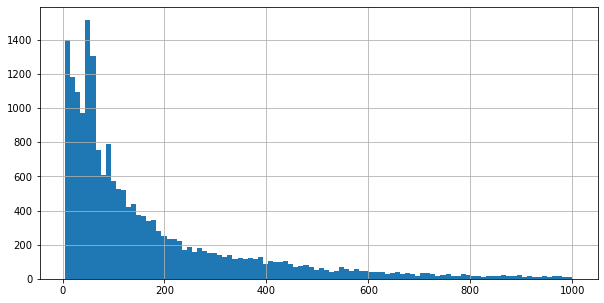

In [43]:
df['days_exposition'].hist(bins=100, figsize=(10,5))

In [44]:
df['days_exposition'].describe()

count    19362.000000
mean       169.226216
std        187.104180
min          5.000000
25%         45.000000
50%         95.000000
75%        224.000000
max       1000.000000
Name: days_exposition, dtype: float64

In [45]:
df['days_exposition'].median()

95.0

Среднее время продажи квартиры составляет 170 дней. Медианное время (оно также выбивается на графике) составляет 95 дней. 

Можно считать продажу быстрой, если квартиру купили менее, чем за 45 дней.

Продажу можно считать дологй, если объявление висело более 225 дней.

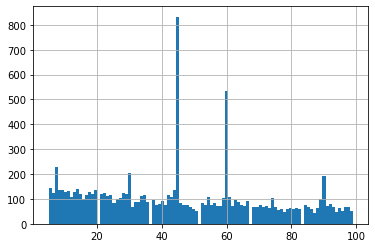

In [46]:
(
    df
    .query('days_exposition<100')['days_exposition']
    .hist(bins=100)
);

Резкий подъем наблюдается на уровне 1 квартиля - 45 дней, а также на уровне 60 и 90 дней. Это можно объяснить особенностью работы сервиса.

## Влияние факторов на стоимость

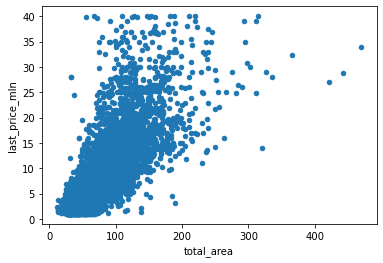

In [47]:
df.plot(x='total_area', y='last_price_mln', kind='scatter');

In [48]:
df['total_area'].corr(df['last_price_mln'])

0.7826735478510692

Связь между общей площадью и ценой сильная прямая

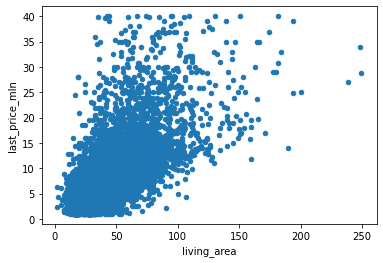

In [49]:
df.plot(x='living_area', y='last_price_mln', kind='scatter');

In [50]:
df['living_area'].corr(df['last_price_mln'])

0.690724115681477

Связь между жилой площадью и ценой средняя прямая

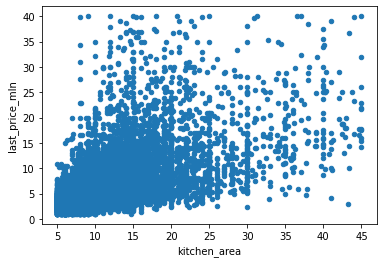

In [51]:
df.plot(x='kitchen_area', y='last_price_mln', kind='scatter');

In [52]:
df['kitchen_area'].corr(df['last_price_mln'])

0.5983996720304251

Связь между площадью кухни и ценой средняя прямая

,last_price_mln
rooms,
0,2.983096
1,3.858053
2,5.522614
3,7.612944
4,10.872918
5,14.941393
6,18.696233


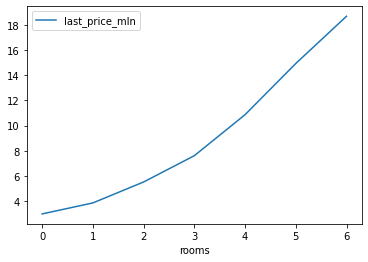

In [53]:
display(df.pivot_table(index='rooms', values='last_price_mln'))
df.pivot_table(index='rooms', values='last_price_mln').plot();

In [54]:
df['rooms'].corr(df['last_price_mln'])

0.4969575505073009

Связь между количеством комнат и ценой средняя прямая

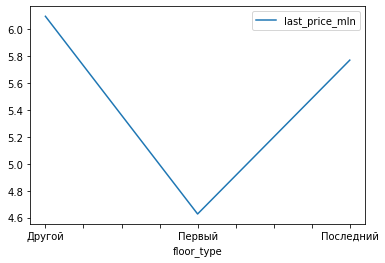

In [55]:
df.pivot_table(index='floor_type', values='last_price_mln').plot();

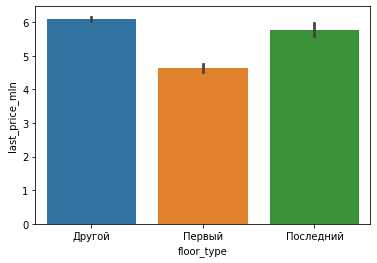

In [56]:
seaborn.barplot(x=df['floor_type'], y=df['last_price_mln']);

,last_price_mln
month,
1,5.947734
2,5.899344
3,5.818558
4,5.857744
5,5.936463
6,5.703635
7,5.838228
8,5.905137
9,5.945389


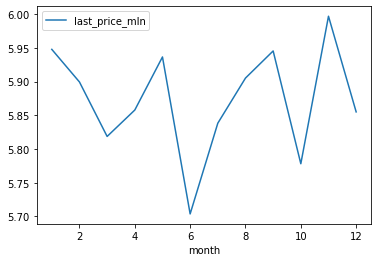

In [57]:
display(df.pivot_table(index='month', values='last_price_mln'))
df.pivot_table(index='month', values='last_price_mln').plot();

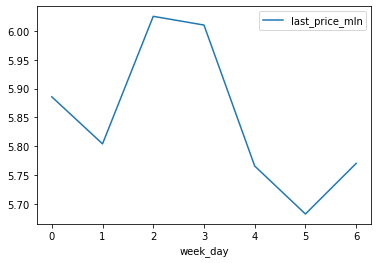

In [58]:
df.pivot_table(index='week_day', values='last_price_mln').plot();

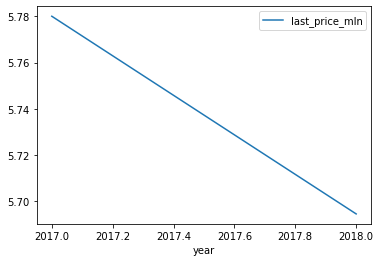

In [59]:
(
    df
    .query('2016<year<2019')
    .pivot_table(index='year', values='last_price_mln')
    .plot()
);

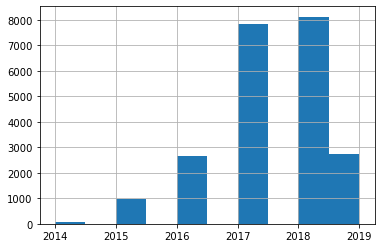

In [60]:
df['year'].hist();

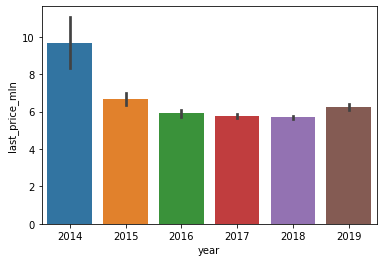

In [61]:
seaborn.barplot(x=df['year'], y=df['last_price_mln']);

### Промежуточный вывод

Наиболее сильная зависимость наблюдается между общей площадью и итоговой ценой. Выше площадь - выше цена. При площади более 200 кв.м. зависимости нет. Скорее всего, это связано с небольшим количеством таких объявлений.

Средняя прямая связь между итоговой ценой и жилой площадью квартиры, площадью кухни, количеством комнат. 

При расположении квартиры на 1 этаже итоговая цена значительно снижаетя.

Самая высокая цена - при продаже в 5, 9, 11 месяцы. Самая низкая - в 6 и 10. Однако разница средней цены здесь незначительна (мин- 5.7, макс- 6.0)

Больше стоили квартиры, объявления которых были размещены в среду или четверг. Меньше - в субботу

Связь между ценой и годом продажи оценить сложно - достаточно информации только по 2017 и 2018 году. 

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [62]:
locality_ten = df.pivot_table(index='locality_name_new', values='total_area', aggfunc='count')
locality_ten.columns = ['number_of_ads']
locality_ten = locality_ten.sort_values(by = 'number_of_ads', ascending=False).head(10)

In [63]:
df['group_name'] = (
    df['locality_name_new']
    .where(df['locality_name_new'].isin(locality_ten.index), 'Другие')
)

,sq_met_price
group_name,
Всеволожск,68.885870
Выборг,58.782196
Гатчина,69.071006
Другие,61.113653
Колпино,75.203128
Кудрово,95.273651
Пушкин,102.592249
Санкт-Петербург,111.463209
поселок Мурино,85.551491


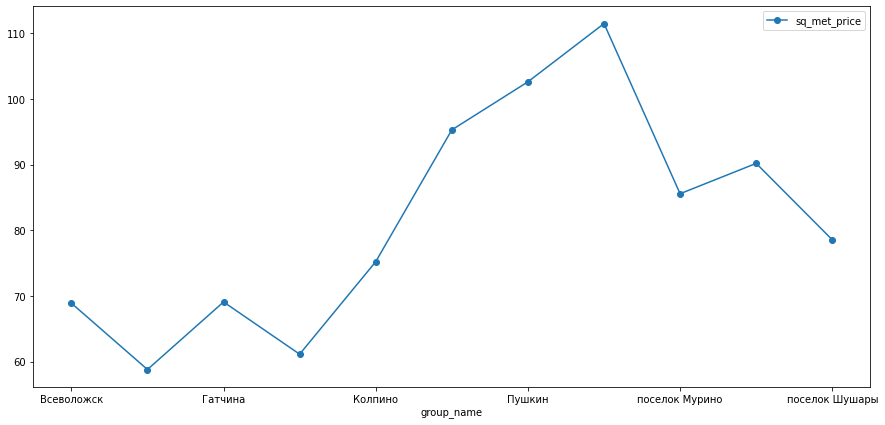

In [64]:
data = df.pivot_table(index = 'group_name', values='sq_met_price')
display(data)
data.plot(style='o-', figsize=(15,7));

Самая высокая цена за кв м в Санкт-Петербурге. Самая низкая - в Выборге

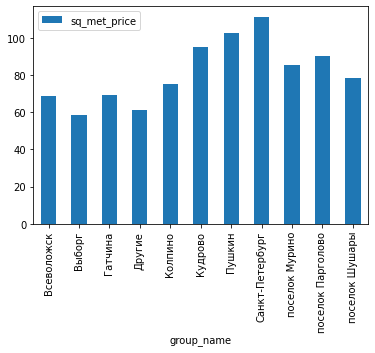

In [65]:
data.plot(y='sq_met_price', kind='bar');

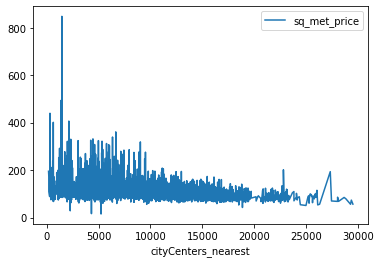

In [66]:
(
    df
    .query('locality_name_new=="Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest', values='sq_met_price')
    .plot()
);

In [67]:
data = df.query('locality_name_new=="Санкт-Петербург"')
data['cityCenters_nearest'].corr(data['sq_met_price'])

-0.3392848363108957

Таким образом, максимальная цена за кв.м. у квартир в пределах 2 км. от центра. Далее связь слабая обратая - чем больше расстояние от центра, тем ниже цена. Центром можно считать расстояние до 10км.

### Общий вывод

1. Наиболее сильная зависимость наблюдается между общей площадью и итоговой ценой. Выше площадь - выше цена. При площади более 200 кв.м. зависимости нет. Скорее всего, это связано с небольшим количеством таких объявлений.

2. Средняя прямая связь между итоговой ценой и жилой площадью квартиры, площадью кухни, количеством комнат. 

3. При расположении квартиры на 1 этаже итоговая цена значительно снижаетя.

4. Самая высокая цена - при продаже в 5, 9, 11 месяцы. Самая низкая - в 6 и 10. Однако разница средней цены здесь незначительна (мин- 5.7, макс- 6.0)

5. Больше стоили квартиры, объявления которых были размещены в среду или четверг. Меньше - в субботу

6. Связь между ценой и годом продажи оценить сложно - достаточно информации только по 2017 и 2018 году. 

7. 10 населенных пунктов с наибольшим количеством объявлений: Санкт-Петербург, Всеволожск, Выборг, Гатчина, Колпино, Кудрово, Пушкин, поселок Мурино, поселок Парголово, поселок Шушары. Самая высокая цена за кв.м. в Петербурге - 111,5 тыс. руб. Самая низкая - в Выборге (58,8 тыс.).

8. Связь между расстоянием от центра Петербурга и стоимостью кв.м. слабая отрицательная. Однако наблюдается резкое увеличение цены в пределах 2км. от центра города